<a href="https://colab.research.google.com/github/botkin92/Mathstat/blob/lesson_5/Mathstat_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

### **Задача 1**

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

In [2]:
std = 16
mu = 80
n = 256
p = 0.95

In [3]:
p = 0.95
alpha = 1 - p

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-1.9693105698491928, 1.9693105698491928)

In [4]:
(mu + t1 * std / np.sqrt(n), mu + t2 * std / np.sqrt(n))

(78.0306894301508, 81.9693105698492)

### **Задача 2**

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

Пусть Ho - математическое ожидание веса печенья 200 г.
Тогда H1 - математическое ожидание не равно 200 г.

In [5]:
weight = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
n = 10
mu = 200
alpha = 0.01

Т.к. неизвестна дисперсия случайной величины, необходимо использовать на t-статистику

In [6]:
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-3.24983554401537, 3.2498355440153697)

Критическая область:
$$\Omega_\alpha = (-\infty, -3.25) \cup (3.25, \infty)$$

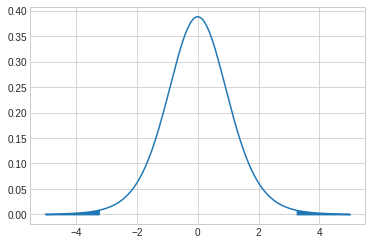

In [7]:
ox = np.linspace(-5, 5, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-5, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 5, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, color='C0')
plt.fill_between(ox_right, oy_right, color='C0')

In [8]:
statistic =  (weight.mean() - mu) / (weight.std(ddof=1) / np.sqrt(n))

In [9]:
statistic

-1.0651074037450896

Значение статистики не попало в критическую область, значит гипотеза не отвергается.

In [10]:
p_left = stats.t.cdf(statistic, df=n - 1)
p_right = 1 - stats.t.cdf(statistic, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.31456660352472854

### **Задача 3**

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

In [11]:
mu = 17
alpha = 0.025
n = 100
mean = 17.5
var = 4

Пусть Ho - математическое ожидание диаметра подшипников 17 мм. Тогда H1 - математическое ожидание не равно 17 мм.

Т.к. известно квадратическое отклонение, можно применить Z статистику.

In [12]:
statistic = (mean - mu) / (var / np.sqrt(n))
statistic

1.25

In [13]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-2.241402727604945, 2.241402727604947)

Критическая область:
$$\Omega_\alpha = (-\infty, -2.24) \cup (2.24, \infty)$$

Значение не попало в критическую область. Нулевая гипотеза не отвергается.